<a href="https://colab.research.google.com/github/Devansh-react/PyTorch_fundamentals/blob/main/Ch_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building ANN**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv("/content/fmnist_small.csv")
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,6000.000000,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.00000
mean,4.489667,0.0,0.003333,0.022833,0.095833,0.229667,0.380833,0.815000,2.040500,5.851500,...,34.411500,23.410833,16.781833,18.320167,23.820167,18.936833,9.157167,2.783833,0.903833,0.09300
std,2.840464,0.0,0.075210,0.457180,2.494464,4.855634,5.883755,8.964309,13.320114,24.088175,...,57.150747,48.769483,42.327168,44.743938,53.096607,46.870204,31.205610,17.486349,9.630180,2.54508
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.000000,8.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,0.0,3.000000,32.000000,146.000000,224.000000,213.000000,221.000000,221.000000,222.000000,...,255.000000,249.000000,255.000000,255.000000,254.000000,255.000000,248.000000,255.000000,192.000000,97.00000


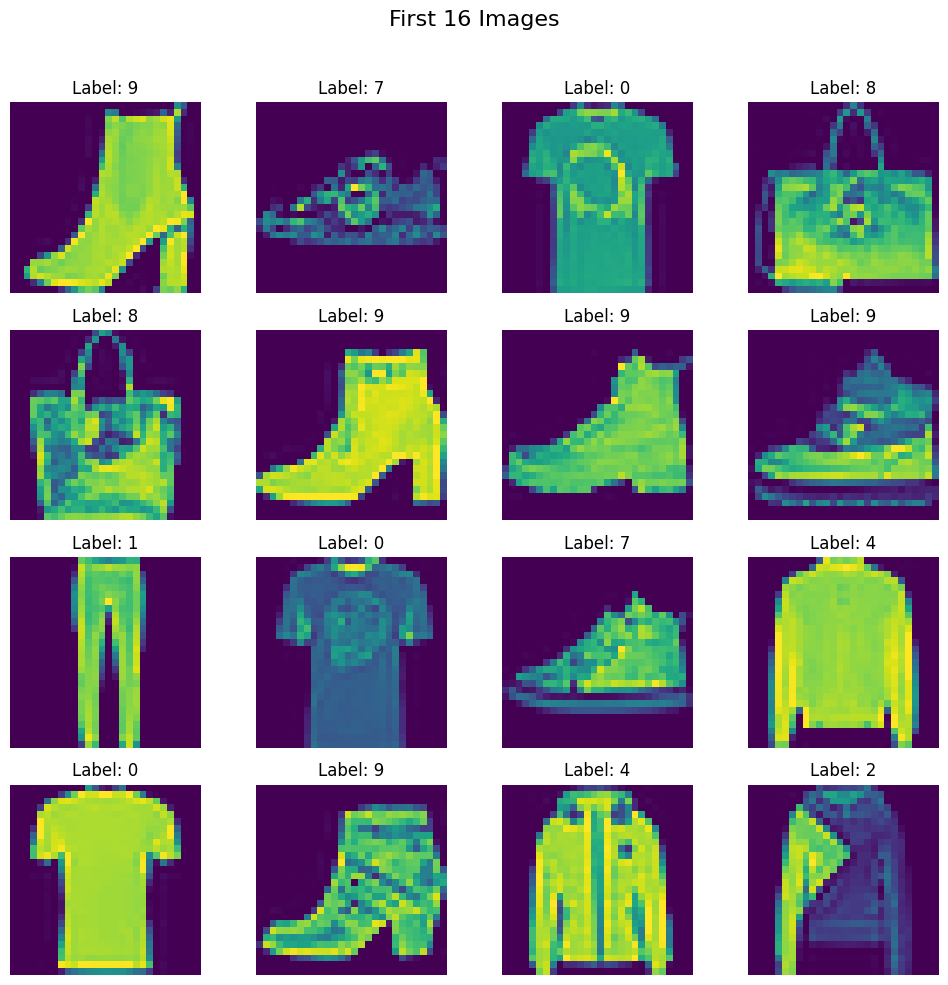

In [28]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [29]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Fill NaN values with 0 before splitting and normalization
X = np.nan_to_num(X, nan=0.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train/255.0
X_test = X_test/255.0
X_train,X_test

(array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
         0.       ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ...

In [30]:
# custom class dataset

class customDataset(Dataset):

  def __init__(self,feature,lables):
    self.feature = torch.tensor(feature,dtype=torch.float32)
    self.lables = torch.tensor(lables,dtype=torch.long)

  def __len__(self):
    return len(self.feature)

  def __getitem__(self, index):

    return self.feature[index],self.lables[index]

In [31]:
train_Dataset = customDataset(X_train,y_train)
test_Dataset = customDataset(X_test,y_test)

In [32]:
train_dataloder = DataLoader(train_Dataset,batch_size=32,shuffle=True)
test_dataloader = DataLoader(test_Dataset,batch_size=32,shuffle=False)

In [33]:
# NN

class NNmodule(nn.Module):
  def __init__(self,num_feature):
    super().__init__()
    self.Model = nn.Sequential(
        nn.Linear(num_feature,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(), # Added back the ReLU activation
        nn.Linear(64,10)
    )

  def forward(self,X):

    return self.Model(X)

In [34]:
epochs=100
learning_rate = 0.01

In [35]:
model = NNmodule(X_train.shape[1])

loss_fun = nn.CrossEntropyLoss()

optimiser = optim.SGD(model.parameters(),lr=learning_rate)

In [36]:
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_feature,batch_lable in train_dataloder:

    output = model(batch_feature)

    loss = loss_fun(output,batch_lable)

    optimiser.zero_grad()
    loss.backward()

    optimiser.step()
    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_dataloder)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 2.1962625710169474
Epoch: 2 , Loss: 1.8683723100026448
Epoch: 3 , Loss: 1.4264784423510233
Epoch: 4 , Loss: 1.1570725762844085
Epoch: 5 , Loss: 1.009363783200582
Epoch: 6 , Loss: 0.9159664591153462
Epoch: 7 , Loss: 0.8590808792908986
Epoch: 8 , Loss: 0.8112617603937785
Epoch: 9 , Loss: 0.7750847164789836
Epoch: 10 , Loss: 0.7456735479831695
Epoch: 11 , Loss: 0.7232037204504013
Epoch: 12 , Loss: 0.6986588476101557
Epoch: 13 , Loss: 0.681261040965716
Epoch: 14 , Loss: 0.6604786272843679
Epoch: 15 , Loss: 0.6480391778548559
Epoch: 16 , Loss: 0.6305205748478572
Epoch: 17 , Loss: 0.610486775636673
Epoch: 18 , Loss: 0.5968518231312434
Epoch: 19 , Loss: 0.5854862966140111
Epoch: 20 , Loss: 0.5686942112445831
Epoch: 21 , Loss: 0.5610994230707487
Epoch: 22 , Loss: 0.5484511107206345
Epoch: 23 , Loss: 0.5392569994926453
Epoch: 24 , Loss: 0.5281700602173806
Epoch: 25 , Loss: 0.5209175203243891
Epoch: 26 , Loss: 0.5108351090550423
Epoch: 27 , Loss: 0.5005500721931457
Epoch: 28 , L

In [37]:
model.eval()



NNmodule(
  (Model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

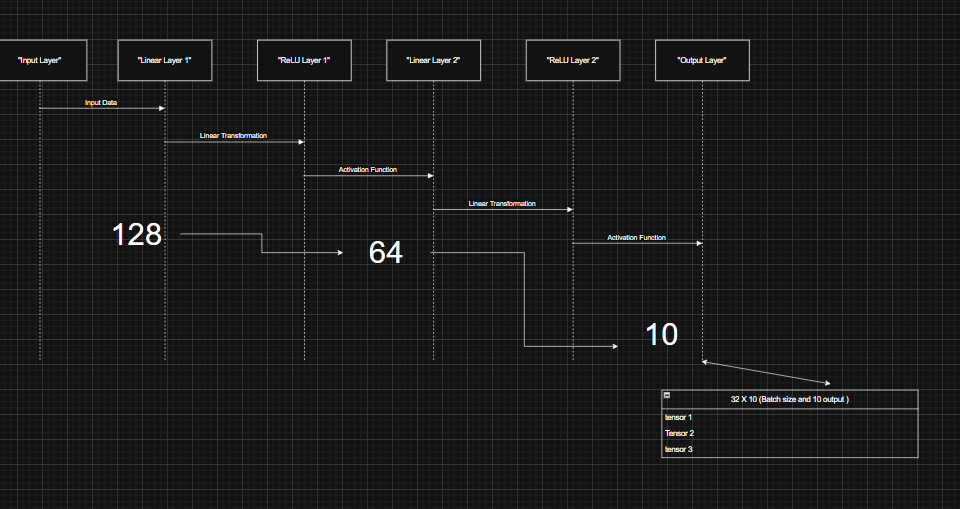

In [38]:
model.eval()
total = 0
correct = 0

for batch_feature , batch_lable in test_dataloader:
  output  = model(batch_feature)
  _,predicted = torch.max(output,1)
  #  no of rows every batch
  total += batch_feature.shape[0]
  #  no of max value from each tensor that have value same as lables means predicted == actual
  correct += (predicted == batch_lable).sum().item()

print(correct/total)


0.8166666666666667
